In [1]:
from dtsp.dataset import walk_forward_split
from dtsp.param import Seq2Seq_HP, SIMPLE_SEQ2SEQ_HP, SIMPLE_WAVENET_HP
from dtsp.models import Seq2Seq, SimpleSeq2Seq, SimpleWaveNet
from torch.utils.data import DataLoader
import torch
import os
import matplotlib.pyplot as plt
from dtsp.dataset import example_1

In [6]:
enc_lens = 24
dec_lens = 12
batch_size = 32
n_test = 13

hp_seq2seq = Seq2Seq_HP
hp_seq2seq['path'] = r'C:\Users\evilp\project\Deep-Time-Series-Prediction\dtsp\examples\seq2seq_logs'
train_seq2seq, valid_seq2seq = example_1(enc_lens, dec_lens, n_test)
hp_seq2seq['target_size'] = 20
hp_seq2seq['hidden_size'] = 36
hp_seq2seq['trans_hidden_size'] = 4
hp_seq2seq['trans_category_var'] = [(13, 2)]
hp_seq2seq.update({
    'lr_scheduler': 'CosineAnnealingWarmRestarts',
    'lr_scheduler_kw': {'T_0': 4, 'T_mult': 3},
})

train_dataloader_seq2seq = DataLoader(train_seq2seq, batch_size, shuffle=True)
valid_dataloader_seq2seq = DataLoader(valid_seq2seq, batch_size, shuffle=False)

seq2seq = Seq2Seq(hp_seq2seq)
seq2seq.fit(100, train_dataloader_seq2seq, valid_dataloader_seq2seq, early_stopping=10)

batch 6 / 6, loss 1.045: 100%|██████████| 6/6 [00:00<00:00, 16.13it/s]


epoch 1 / 100, loss 1.054, val loss 1.177


batch 6 / 6, loss 0.993: 100%|██████████| 6/6 [00:00<00:00, 15.55it/s]


epoch 2 / 100, loss 1.034, val loss 1.175


batch 6 / 6, loss 1.028: 100%|██████████| 6/6 [00:00<00:00, 14.02it/s]


epoch 3 / 100, loss 1.028, val loss 1.174


batch 6 / 6, loss 1.002: 100%|██████████| 6/6 [00:00<00:00, 15.00it/s]


epoch 4 / 100, loss 1.025, val loss 1.174


batch 6 / 6, loss 0.935: 100%|██████████| 6/6 [00:00<00:00, 15.47it/s]


epoch 5 / 100, loss 1.002, val loss 1.163


batch 6 / 6, loss 0.901: 100%|██████████| 6/6 [00:00<00:00, 15.00it/s]


epoch 6 / 100, loss 0.984, val loss 1.134


batch 6 / 6, loss 0.859: 100%|██████████| 6/6 [00:00<00:00, 15.87it/s]


epoch 7 / 100, loss 0.889, val loss 1.055


batch 6 / 6, loss 0.833: 100%|██████████| 6/6 [00:00<00:00, 14.26it/s]


epoch 8 / 100, loss 0.857, val loss 0.959


batch 6 / 6, loss 0.944: 100%|██████████| 6/6 [00:00<00:00, 14.89it/s]


epoch 9 / 100, loss 0.839, val loss 1.035


batch 6 / 6, loss 0.975: 100%|██████████| 6/6 [00:00<00:00, 15.43it/s]


epoch 10 / 100, loss 0.874, val loss 1.173


batch 6 / 6, loss 0.886: 100%|██████████| 6/6 [00:00<00:00, 14.93it/s]


epoch 11 / 100, loss 0.931, val loss 1.212


batch 6 / 6, loss 0.967: 100%|██████████| 6/6 [00:00<00:00, 14.12it/s]


epoch 12 / 100, loss 0.917, val loss 1.133


batch 6 / 6, loss 0.887: 100%|██████████| 6/6 [00:00<00:00, 14.67it/s]


epoch 13 / 100, loss 0.857, val loss 1.089


batch 6 / 6, loss 0.817: 100%|██████████| 6/6 [00:00<00:00, 14.75it/s]


epoch 14 / 100, loss 0.828, val loss 1.059


batch 6 / 6, loss 0.758: 100%|██████████| 6/6 [00:00<00:00, 14.26it/s]


epoch 15 / 100, loss 0.823, val loss 1.040


batch 6 / 6, loss 0.837: 100%|██████████| 6/6 [00:00<00:00, 13.86it/s]


epoch 16 / 100, loss 0.825, val loss 1.035


batch 6 / 6, loss 0.910: 100%|██████████| 6/6 [00:00<00:00, 13.83it/s]


epoch 17 / 100, loss 0.823, val loss 1.115


batch 6 / 6, loss 1.079: 100%|██████████| 6/6 [00:00<00:00, 13.86it/s]


epoch 18 / 100, loss 0.992, val loss 1.205


batch 6 / 6, loss 0.924: 100%|██████████| 6/6 [00:00<00:00, 14.60it/s]


epoch 19 / 100, loss 1.019, val loss 1.183
early_stopping ! current epochs: 19, best epochs: 8
best model save in C:\Users\evilp\project\Deep-Time-Series-Prediction\dtsp\examples\seq2seq_logs\Seq2Seq_epoch_8_0.959.pkl


In [9]:
hp_simple_seq = SIMPLE_SEQ2SEQ_HP
hp_simple_seq['path'] = r'C:\Users\evilp\project\Deep-Time-Series-Prediction\dtsp\examples\simle_seq2seq_logs'
hp_simple_seq['target_size'] = 20
hp_simple_seq['hidden_size'] = 30
hp_simple_seq.update({
    'lr_scheduler': 'CosineAnnealingWarmRestarts',
    'lr_scheduler_kw': {'T_0': 4, 'T_mult': 3},
})

train_simple_seq, valid_simple_seq = example_1(enc_lens, dec_lens, n_test, model_type='simple_seq2seq')
train_dataloader_simple_seq = DataLoader(train_simple_seq, batch_size, shuffle=True)
valid_dataloader_simple_seq = DataLoader(valid_simple_seq, batch_size, shuffle=False)

simle_seq2seq = SimpleSeq2Seq(hp_simple_seq)

simle_seq2seq.fit(20, train_dataloader_simple_seq, valid_dataloader_simple_seq)

batch 6 / 6, loss 1.011: 100%|██████████| 6/6 [00:00<00:00, 31.50it/s]


epoch 1 / 20, loss 1.070, val loss 1.182


batch 6 / 6, loss 1.017: 100%|██████████| 6/6 [00:00<00:00, 33.24it/s]


epoch 2 / 20, loss 1.058, val loss 1.178


batch 6 / 6, loss 1.068: 100%|██████████| 6/6 [00:00<00:00, 32.88it/s]


epoch 3 / 20, loss 1.055, val loss 1.176


batch 6 / 6, loss 1.105: 100%|██████████| 6/6 [00:00<00:00, 31.17it/s]


epoch 4 / 20, loss 1.052, val loss 1.176


batch 6 / 6, loss 1.068: 100%|██████████| 6/6 [00:00<00:00, 33.61it/s]


epoch 5 / 20, loss 1.046, val loss 1.173


batch 6 / 6, loss 0.982: 100%|██████████| 6/6 [00:00<00:00, 32.00it/s]


epoch 6 / 20, loss 1.039, val loss 1.170


batch 6 / 6, loss 1.044: 100%|██████████| 6/6 [00:00<00:00, 33.06it/s]


epoch 7 / 20, loss 1.030, val loss 1.166


batch 6 / 6, loss 1.016: 100%|██████████| 6/6 [00:00<00:00, 33.99it/s]


epoch 8 / 20, loss 1.003, val loss 1.158


batch 6 / 6, loss 1.057: 100%|██████████| 6/6 [00:00<00:00, 29.20it/s]


epoch 9 / 20, loss 0.998, val loss 1.143


batch 6 / 6, loss 0.866: 100%|██████████| 6/6 [00:00<00:00, 32.35it/s]


epoch 10 / 20, loss 0.958, val loss 1.118


batch 6 / 6, loss 0.909: 100%|██████████| 6/6 [00:00<00:00, 32.17it/s]


epoch 11 / 20, loss 0.944, val loss 1.082


batch 6 / 6, loss 0.821: 100%|██████████| 6/6 [00:00<00:00, 36.03it/s]


epoch 12 / 20, loss 0.879, val loss 1.046


batch 6 / 6, loss 0.843: 100%|██████████| 6/6 [00:00<00:00, 35.60it/s]


epoch 13 / 20, loss 0.860, val loss 1.023


batch 6 / 6, loss 0.904: 100%|██████████| 6/6 [00:00<00:00, 30.38it/s]


epoch 14 / 20, loss 0.880, val loss 1.011


batch 6 / 6, loss 0.831: 100%|██████████| 6/6 [00:00<00:00, 31.17it/s]


epoch 15 / 20, loss 0.869, val loss 1.006


batch 6 / 6, loss 0.841: 100%|██████████| 6/6 [00:00<00:00, 32.17it/s]


epoch 16 / 20, loss 0.859, val loss 1.005


batch 6 / 6, loss 0.785: 100%|██████████| 6/6 [00:00<00:00, 32.70it/s]


epoch 17 / 20, loss 0.847, val loss 0.974


batch 6 / 6, loss 0.812: 100%|██████████| 6/6 [00:00<00:00, 34.78it/s]


epoch 18 / 20, loss 0.813, val loss 0.974


batch 6 / 6, loss 0.785: 100%|██████████| 6/6 [00:00<00:00, 34.98it/s]


epoch 19 / 20, loss 0.798, val loss 0.964


batch 6 / 6, loss 0.726: 100%|██████████| 6/6 [00:00<00:00, 34.98it/s]


epoch 20 / 20, loss 0.781, val loss 0.951
best model save in C:\Users\evilp\project\Deep-Time-Series-Prediction\dtsp\examples\simle_seq2seq_logs\SimpleSeq2Seq_epoch_20_0.951.pkl


batch 6 / 6, loss 1.068: 100%|██████████| 6/6 [00:01<00:00,  5.05it/s]


epoch 1 / 50, loss 1.058, val loss 1.185


batch 6 / 6, loss 1.071: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]


epoch 2 / 50, loss 1.039, val loss 1.175


batch 6 / 6, loss 0.949: 100%|██████████| 6/6 [00:01<00:00,  5.15it/s]


epoch 3 / 50, loss 1.008, val loss 1.166


batch 6 / 6, loss 0.925: 100%|██████████| 6/6 [00:01<00:00,  5.14it/s]


epoch 4 / 50, loss 0.973, val loss 1.159


batch 6 / 6, loss 0.995: 100%|██████████| 6/6 [00:01<00:00,  5.09it/s]


epoch 5 / 50, loss 0.953, val loss 1.157


batch 6 / 6, loss 0.879: 100%|██████████| 6/6 [00:01<00:00,  5.10it/s]


epoch 6 / 50, loss 0.916, val loss 1.110


batch 6 / 6, loss 0.916: 100%|██████████| 6/6 [00:01<00:00,  5.09it/s]


epoch 7 / 50, loss 0.959, val loss 1.164


batch 6 / 6, loss 0.921: 100%|██████████| 6/6 [00:01<00:00,  5.09it/s]


epoch 8 / 50, loss 0.922, val loss 1.200


batch 6 / 6, loss 0.887: 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]


epoch 9 / 50, loss 0.928, val loss 1.170


batch 6 / 6, loss 0.907: 100%|██████████| 6/6 [00:01<00:00,  5.10it/s]


epoch 10 / 50, loss 0.900, val loss 1.130


batch 6 / 6, loss 0.874: 100%|██████████| 6/6 [00:01<00:00,  4.99it/s]


epoch 11 / 50, loss 0.878, val loss 1.099


batch 6 / 6, loss 0.851: 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]


epoch 12 / 50, loss 0.875, val loss 1.081


batch 6 / 6, loss 0.910: 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]


epoch 13 / 50, loss 0.878, val loss 1.069


batch 6 / 6, loss 0.873: 100%|██████████| 6/6 [00:01<00:00,  5.12it/s]


epoch 14 / 50, loss 0.875, val loss 1.063


batch 6 / 6, loss 0.900: 100%|██████████| 6/6 [00:01<00:00,  5.03it/s]


epoch 15 / 50, loss 0.868, val loss 1.061


batch 6 / 6, loss 0.762: 100%|██████████| 6/6 [00:01<00:00,  5.10it/s]


epoch 16 / 50, loss 0.838, val loss 1.075


batch 6 / 6, loss 0.978: 100%|██████████| 6/6 [00:01<00:00,  5.06it/s]


epoch 17 / 50, loss 0.855, val loss 1.453


batch 6 / 6, loss 0.927: 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]


epoch 18 / 50, loss 0.924, val loss 1.714


batch 6 / 6, loss 0.793: 100%|██████████| 6/6 [00:01<00:00,  5.17it/s]


epoch 19 / 50, loss 0.885, val loss 1.104


batch 6 / 6, loss 0.806: 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]


epoch 20 / 50, loss 0.837, val loss 1.148


batch 6 / 6, loss 0.962: 100%|██████████| 6/6 [00:01<00:00,  5.11it/s]


epoch 21 / 50, loss 0.910, val loss 1.189


batch 6 / 6, loss 0.941: 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]


epoch 22 / 50, loss 0.936, val loss 1.168


batch 6 / 6, loss 0.945: 100%|██████████| 6/6 [00:01<00:00,  5.15it/s]


epoch 23 / 50, loss 0.880, val loss 1.172


batch 6 / 6, loss 0.918: 100%|██████████| 6/6 [00:01<00:00,  5.22it/s]


epoch 24 / 50, loss 0.920, val loss 1.162


batch 6 / 6, loss 0.846: 100%|██████████| 6/6 [00:01<00:00,  5.12it/s]


epoch 25 / 50, loss 0.897, val loss 1.223


batch 6 / 6, loss 0.914: 100%|██████████| 6/6 [00:01<00:00,  5.07it/s]


epoch 26 / 50, loss 0.885, val loss 1.304


batch 6 / 6, loss 0.924: 100%|██████████| 6/6 [00:01<00:00,  4.95it/s]


epoch 27 / 50, loss 0.913, val loss 1.256


batch 6 / 6, loss 0.846: 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]


epoch 28 / 50, loss 0.898, val loss 1.204


batch 6 / 6, loss 0.904: 100%|██████████| 6/6 [00:01<00:00,  5.06it/s]


epoch 29 / 50, loss 0.876, val loss 1.170


batch 6 / 6, loss 0.843: 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]


epoch 30 / 50, loss 0.852, val loss 1.142


batch 6 / 6, loss 0.805: 100%|██████████| 6/6 [00:01<00:00,  5.10it/s]


epoch 31 / 50, loss 0.819, val loss 1.121
early_stopping ! current epochs: 31, best epochs: 15
best model save in C:\Users\evilp\project\Deep-Time-Series-Prediction\dtsp\examples\logs\SimpleWaveNet_epoch_15_1.061.pkl


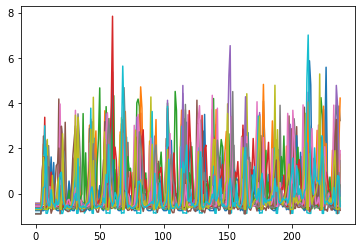

In [15]:
hp = SIMPLE_WAVENET_HP
hp['path'] = r'C:\Users\evilp\project\Deep-Time-Series-Prediction\dtsp\examples\logs'
hp['dilation'] = [1, 2, 4, 8, 16, 32]
hp['target_size'] = 20
hp['residual_channels'] = 64
hp['learning_rate'] = 0.001
hp_simple_seq.update({
    'lr_scheduler': 'CosineAnnealingWarmRestarts',
    'lr_scheduler_kw': {'T_0': 4, 'T_mult': 10},
})
train, valid = example_1(enc_lens, dec_lens, n_test, model_type='simple_wavenet')
plt.plot(train.dataset.seqs)
train_dataloader = DataLoader(train, batch_size, shuffle=True)
valid_dataloader = DataLoader(valid, batch_size, shuffle=False)


model = SimpleWaveNet(hp)

model.fit(50, train_dataloader, valid_dataloader, early_stopping=15)


In [26]:
model.optimizer.param_groups[0]['lr']

0.0002824752489999998